In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pylab
import math
import random
import sklearn


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_numeric_dtype

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from math import sqrt

from catboost import CatBoostRegressor
from catboost import Pool, cv

%matplotlib inline

In [75]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры_Владивосток/Выборка.xlsx', sheet_name = 0)
df

,ID,Мусор,Агрегатор,LN(Цена),LNLN(Цена),Корень2(Цена),Корень3(Цена),Цена,Цена_перв,Прогноз_1,...,Расположение на этаже,Срок сдачи,Выдача ключей,Отделка,Название новостройки,Тип участия,Название ЖК,Подъезд,Способ продажи,Вид сделки
0,1_этажи,0,этажи,15.955577,NaN,NaN,NaN,8500000,9500000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2_этажи,1,этажи,15.990262,NaN,NaN,NaN,8800000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3_этажи,0,этажи,15.747032,NaN,NaN,NaN,6900000,7100000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4_этажи,0,этажи,16.627921,NaN,NaN,NaN,16650000,16800000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5_этажи,0,этажи,15.894952,NaN,NaN,NaN,8000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8962,3807_фарпост,0,фарпост,17.370859,NaN,NaN,NaN,35000000,NaN,35000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8963,3808_фарпост,0,фарпост,16.418200,2.798390,3674.234614,238.110158,13500000,NaN,13500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8964,3809_фарпост,0,фарпост,15.816991,2.761085,2720.294102,194.869516,7400000,NaN,7400000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8965,3810_фарпост,0,фарпост,16.001562,2.772686,2983.286778,207.235110,8900000,NaN,8900000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df = df[df['Мусор'] == 0]
df = df[df['dup_res'] == 0]
df = df[df['Выброс_итог'] == 0]

#df = df[df['LN(Цена)'] <= 18]
#df = df[df['LN(Цена)'] >= 14.5]

df.reset_index(drop = True, inplace = True)
df

,ID,Мусор,Агрегатор,LN(Цена),LNLN(Цена),Корень2(Цена),Корень3(Цена),Цена,Цена_перв,Прогноз_1,...,Расположение на этаже,Срок сдачи,Выдача ключей,Отделка,Название новостройки,Тип участия,Название ЖК,Подъезд,Способ продажи,Вид сделки
0,33_этажи,0,этажи,15.039286,2.710666,1843.908891,150.369460,3400000,3600000.0,3.392260e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58_этажи,0,этажи,15.869634,2.764407,2792.848009,198.319248,7800000,NaN,6.809348e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71_этажи,0,этажи,15.830414,2.761933,2738.612788,195.743382,7500000,NaN,6.552275e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85_этажи,0,этажи,15.640060,2.749836,2489.979920,183.709055,6200000,NaN,6.572362e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105_этажи,0,этажи,15.444751,2.737269,2258.317958,172.130062,5100000,5150000.0,5.744776e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,3806_фарпост,0,фарпост,15.656060,2.750858,2509.980080,184.691475,6300000,NaN,5.975461e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4494,3808_фарпост,0,фарпост,16.418200,2.798390,3674.234614,238.110158,13500000,NaN,1.350000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4495,3809_фарпост,0,фарпост,15.816991,2.761085,2720.294102,194.869516,7400000,NaN,7.400000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4496,3810_фарпост,0,фарпост,16.001562,2.772686,2983.286778,207.235110,8900000,NaN,8.900000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df['ГП_2'] = df['ГП_2'].astype(int) #обращаю внимание, что год постройки воспринимался как object

In [78]:
df['ГП_2'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4498 entries, 0 to 4497
Series name: ГП_2
Non-Null Count  Dtype
--------------  -----
4498 non-null   int32
dtypes: int32(1)
memory usage: 17.7 KB


In [775]:
df['Этаж_1_group'] = pd.cut(df['Этаж_1'], [0, 1, 5, 10, 25, 50])
t = df.groupby('Этаж_1_group', dropna = False)['Цена(кв.м)'].agg(['count', 'mean', 'median'])
t

,count,mean,median
Этаж_1_group,,,
"(0, 1]",555,154781.745669,151315.789474
"(1, 5]",1942,169834.775088,163806.664084
"(5, 10]",1129,173628.560469,167192.429022
"(10, 25]",865,189546.203458,179584.120983
"(25, 50]",10,293761.904762,309000.000000


In [777]:
df['Этажность_1_group'] = pd.cut(df['Этаж_1'], [0, 5, 10, 25, 60])
t = df.groupby('Этажность_1_group', dropna = False)['Цена(кв.м)'].agg(['count', 'mean', 'median'])
t

,count,mean,median
Этажность_1_group,,,
"(0, 5]",2497,166488.987612,160493.827160
"(5, 10]",1129,173628.560469,167192.429022
"(10, 25]",865,189546.203458,179584.120983
"(25, 60]",10,293761.904762,309000.000000


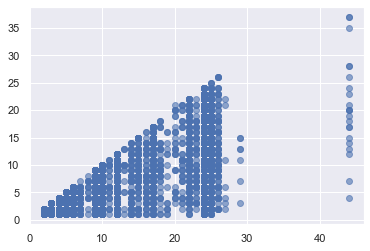

In [996]:
plt.scatter(df['Этажность_1'], df['Этаж_1'], alpha = 0.6)

In [10]:
df_p1 = df[df['ЖК'] == 'престижный+']

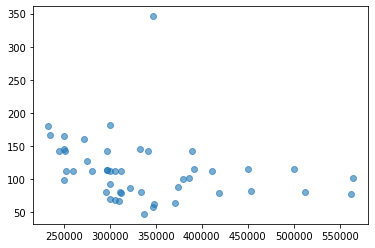

In [11]:
plt.scatter(df_p1['Цена(кв.м)'], df_p1['ОПлощадь'], alpha = 0.6)

In [34]:
df_p2 = df[df['ЖК'] == 'престижный']

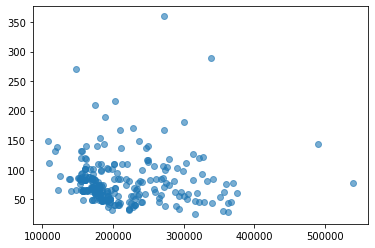

In [35]:
plt.scatter(df_p2['Цена(кв.м)'], df_p2['ОПлощадь'], alpha = 0.6)

In [79]:
X = df[[
        'ОПлощадь',
        'Этаж_1',
        #'Этаж_2',
        #'Этаж_3',
        #'Этаж_4',
        #'Этаж_5',
        'Этажность_1',
        #'Этажность_2',
        'ГП_2',
        #'Ремонт_2',
        'Ремонт_3',
        #'Долгота',
        #'Широта',
        #'Просмотры_1',
        #'Раст_центр_1',
        #'Раст_центр_2',
        'Раст_центр_3',
        #'Cluster_2',
        'Район_2',
        'Многоуровневая',
        'Терраса',
        #'Витрины',
        'ЖК',
        #'Статус',
        'Вид_мбзп',
        #'Вид_зр'
      ]]

Y = df['LN(Цена)']

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[4, 5, 6, 7, 8, 9, 10]


In [80]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

#n_folds = 7
#kf = KFold(n_splits = n_folds,  = False, random_state = 0)

catb = CatBoostRegressor(
         iterations = 3500, #максимальное количество построенных деревьев
         random_seed = 6, 
         learning_rate = 0.03, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
         max_depth = 4, #глубина дерева
         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
         #l2_leaf_reg = 20, #коэффициент при члене регуляризации L2 функции потерь
         #bagging_temperature = 1,
         #random_strength = 1,
         one_hot_max_size = 30, #не используем one hot encoding, а включаем one_hot_max_size
         #loss_function = 'MAE', #по умолчанию
         #eval_metric = 'MAPE', #MAPE
         #od_type = 'Iter', #если модель переобучилась
         #od_wait = 20
        ) #делай остановку через 20 итераций
         #если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
         #если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

shuffle_split = ShuffleSplit(n_splits = 10, test_size = 0.10, random_state = 0)

#массив для сохранения итоговых оценок
all_rmse = [] 
all_mae = []
all_mape = []
all_r2 = []

tr = []
te = []

for n, (tr_index, te_index) in enumerate(shuffle_split.split(X, Y)): #kf.split(X, Y)
    print('Обработка процесса №', n)
    
    tr.append(tr_index)
    te.append(te_index)
    
    # Split data and target
    X_train = X.iloc[tr_index]
    Y_train = Y.iloc[tr_index]
    X_test = X.iloc[te_index]
    Y_test = Y.iloc[te_index]


    catb.fit(X_train, Y_train, 
             cat_features = cat_features, #массив с индексами категориальных фичей
             eval_set = (X_test, Y_test),
             verbose = False, 
             #plot = True
            ) #включение графика
 
    pred_test = np.exp(catb.predict(X_test))
    mse_test = mse(np.exp(Y_test), pred_test)
    
    all_rmse.append(round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
    all_mae.append(round(mae(np.exp(Y_test), pred_test), 4))
    all_mape.append(round(mape(np.exp(Y_test), pred_test), 4))
    all_r2.append(r2_score(np.exp(Y_test), pred_test))

Обработка процесса № 0


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 1


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 2


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 3


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 4


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 5


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 6


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 7


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 8


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Обработка процесса № 9


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [81]:
# массив оценок по k блокам
print('MAE:', all_mae)
print('RMSE:', all_rmse)
print('MAPE:', all_mape)
print('R2:', all_r2)

MAE: [787299.8102, 794163.6365, 788465.2507, 737670.8823, 754765.1169, 810862.5551, 728138.23, 836173.0292, 768611.5901, 761436.6772]
RMSE: [1152264.1596, 1199390.3394, 1224215.9643, 1192372.9649, 1044072.8848, 1331453.0916, 1237761.1046, 1506031.7701, 1123071.072, 1146528.2387]
MAPE: [0.084, 0.0874, 0.0816, 0.0776, 0.0844, 0.0821, 0.0779, 0.0788, 0.0826, 0.0809]
R2: [0.9559700687605708, 0.9476753816363999, 0.9562789621262981, 0.9598155196311299, 0.9381818700461735, 0.9473419490784641, 0.9328769388634076, 0.9609231529519048, 0.9416152863628675, 0.9488144361935851]


In [82]:
# среднее значение mae
print('MAE_mean:', np.mean(all_mae))
print('RMSE_mean:', np.mean(all_rmse))
print('MAPE_mean:', np.mean(all_mape))
print('R2_mean:', np.mean(all_r2))

MAE_mean: 776758.67782
RMSE_mean: 1215716.1590000002
MAPE_mean: 0.08173
R2_mean: 0.9489493565650801


In [ ]:
#как было - этаж_3 и раст2
MAE_mean: 839367.1289999998
RMSE_mean: 1565770.1055857143
MAPE_mean: 0.0845
R2_mean: 0.92607408151481
    
#как было - этаж_5 и раст3
MAE_mean: 851229.1772285715
RMSE_mean: 1673523.2844142858
MAPE_mean: 0.08477142857142857
R2_mean: 0.9161141081445302
    
#как было - этаж_1 и раст3
MAE_mean: 839083.5918285715
RMSE_mean: 1544932.6825142857
MAPE_mean: 0.08484285714285715
R2_mean: 0.9279170326774498

#как было - этаж_1 и этаж_2 и раст3
MAE_mean: 831179.1209142858
RMSE_mean: 1525340.9805142859
MAPE_mean: 0.08437142857142857
R2_mean: 0.9296548719565848
    
#как было - этаж_2 и раст3
MAE_mean: 852009.4670000001
RMSE_mean: 1678053.6130999997
MAPE_mean: 0.08474285714285715
R2_mean: 0.9154090130209579

In [1131]:
tr[2]

array([ 292, 1933, 2853, ...,  281,  585,  323])

In [1132]:
te[2] #2861

array([ 166, 1136, 2560, 4032, 4216, 4455, 2284, 3466, 3173, 2470, 3813,
       3248, 1227, 1087, 1951, 1091, 3369, 3845, 3318,  881, 3880, 2089,
       3737, 3667,  112, 3239, 2487, 1723, 4040,  553,  318, 2374,  976,
        236, 3098, 2125, 4454, 2531, 2119, 1674,  656, 2965, 4269, 3496,
       1369, 1920, 4442, 2111,  588, 4365, 1817, 2377, 3157, 3206, 4248,
       1554,  875, 3488, 2148, 4474,  457, 3860, 1671, 2152, 3401, 3717,
       2369, 2919, 4327, 3089, 2204,   49, 2245, 1869, 3454,  152, 1077,
       3219, 3019, 3155,  269, 2459, 3384,  619, 1069, 3472, 4015, 3085,
       4394,  743, 4159,  174, 2615, 2005, 3210, 3055, 1756,  854, 3024,
       1251, 1247,  366, 1601, 4081, 3757,  282,  368,  765,  481, 3324,
       1447, 2664, 3243, 1709,  645, 2738, 2276, 3463,  146, 2234, 3946,
       3697, 4110, 2842, 2556, 1547, 3260, 2236, 1229,  925, 3515, 2060,
       1216, 1536, 3951,  250, 2947,   93, 4285,  848,  541,  365,  379,
        667, 1288,  313,  393, 2916, 2805, 1207, 34

C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 682767.5533
RMSE на обучении: 988422.0964
MAPE на обучении: 0.0725
R2 на обучении: 0.9737
MAE на тесте: 853755.3064
RMSE на тесте: 1710960.6362
MAPE на тесте: 0.0829
R2 на тесте: 0.9262
MAE: 699896.7129
RMSE: 1082758.344
MAPE: 0.0735
R2: 0.9687


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


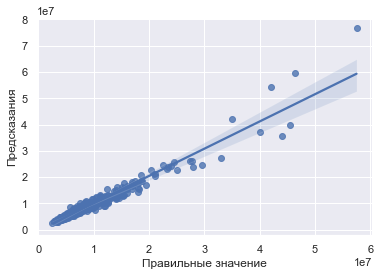

In [1130]:
# Split data and target
X_train = X.iloc[tr[7]]
Y_train = Y.iloc[tr[7]]
X_test = X.iloc[te[7]]
Y_test = Y.iloc[te[7]]

catb = CatBoostRegressor(iterations = 3500, #максимальное количество построенных деревьев
                         random_seed = 6, 
                         learning_rate = 0.03, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 4, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 30, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = [6, 7, 8, 9, 10, 11]

catb.fit(X_train, Y_train, 
         cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

#Ypred = catb.predict(X_test)

pred_1 = np.exp(catb.predict(X))

pred_train = np.exp(catb.predict(X_train))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(catb.predict(X_test))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

#pred_val = catb.predict(X_val)
#mse_val = mse(Y_val, pred_val)
#print("MAE на валидации:", round(mae(Y_val, pred_val), 4))
#print("RMSE на валидации:", round(sqrt(mse(Y_val, pred_val)), 4))
#print("MAPE на валидации:", round(mape(Y_val, pred_val), 4))
#print("R2 на валидации:", round(r2_score(Y_val, pred_val), 4))
#print("===============================")

print("MAE:", round(mae(np.exp(Y), pred_1), 4))
print("RMSE:", round(sqrt(mse(np.exp(Y), pred_1)), 4))
print("MAPE:", round(mape(np.exp(Y), pred_1), 4))
print("R2:", round(r2_score(np.exp(Y), pred_1), 4))

sns.regplot(np.exp(Y_test), pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 703753.7864
RMSE на обучении: 1034360.2783
MAPE на обучении: 0.0745
R2 на обучении: 0.969
MAE на тесте: 875070.3169
RMSE на тесте: 1690297.9317
MAPE на тесте: 0.0872
R2 на тесте: 0.9382
MAE: 720919.6951
RMSE: 1117577.3523
MAPE: 0.0757
R2: 0.965


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


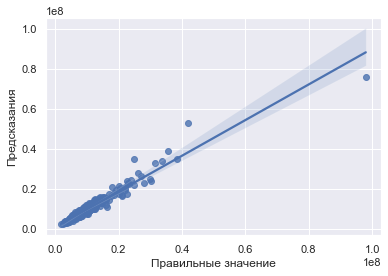

In [1098]:
# Split data and target
X_train = X.iloc[tr[3]]
Y_train = Y.iloc[tr[3]]
X_test = X.iloc[te[3]]
Y_test = Y.iloc[te[3]]

catb = CatBoostRegressor(iterations = 3500, #максимальное количество построенных деревьев
                         random_seed = 6, 
                         learning_rate = 0.03, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 4, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 30, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = [6, 7, 8, 9, 10, 11]

catb.fit(X_train, Y_train, 
         cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

#Ypred = catb.predict(X_test)

pred_1 = np.exp(catb.predict(X))

pred_train = np.exp(catb.predict(X_train))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(catb.predict(X_test))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

#pred_val = catb.predict(X_val)
#mse_val = mse(Y_val, pred_val)
#print("MAE на валидации:", round(mae(Y_val, pred_val), 4))
#print("RMSE на валидации:", round(sqrt(mse(Y_val, pred_val)), 4))
#print("MAPE на валидации:", round(mape(Y_val, pred_val), 4))
#print("R2 на валидации:", round(r2_score(Y_val, pred_val), 4))
#print("===============================")

print("MAE:", round(mae(np.exp(Y), pred_1), 4))
print("RMSE:", round(sqrt(mse(np.exp(Y), pred_1)), 4))
print("MAPE:", round(mape(np.exp(Y), pred_1), 4))
print("R2:", round(r2_score(np.exp(Y), pred_1), 4))

sns.regplot(np.exp(Y_test), pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [1073]:
df[df['Цена'] == 98000000]

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,Прогноз_3,MAE,...,Расположение на этаже,Срок сдачи,Выдача ключей,Отделка,Название новостройки,Тип участия,Название ЖК,Подъезд,Способ продажи,Вид сделки
1375,2144_циан,0,циан,18.400478,98000000,NaN,9.767610e+07,9.962360e+07,9.620402e+07,1.795984e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Свободная продажа, Возможна ипотека"
2861,1894_фарпост,0,фарпост,18.400478,98000000,NaN,8.515501e+07,9.028892e+07,8.524929e+07,1.275071e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1077]:
df.drop(labels = [2861], axis = 0, inplace = True)

In [1078]:
df[df['Цена'] == 98000000]

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз_1,Прогноз_2,Прогноз_3,MAE,...,Расположение на этаже,Срок сдачи,Выдача ключей,Отделка,Название новостройки,Тип участия,Название ЖК,Подъезд,Способ продажи,Вид сделки
1375,2144_циан,0,циан,18.400478,98000000,NaN,9.767610e+07,9.962360e+07,9.620402e+07,1.795984e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Свободная продажа, Возможна ипотека"


# Модель

In [83]:
X = df[[
        'ОПлощадь',
        'Этаж_1',
        #'Этаж_2',
        #'Этаж_3',
        #'Этаж_4',
        #'Этаж_5',
        'Этажность_1',
        #'Этажность_2',
        'ГП_2',
        #'Ремонт_2',
        'Ремонт_3',
        #'Долгота',
        #'Широта',
        #'Просмотры_1',
        #'Раст_центр_1',
        #'Раст_центр_2',
        'Раст_центр_3',
        #'Cluster_2',
        'Район_2',
        'Многоуровневая',
        'Терраса',
        #'Витрины',
        'ЖК',
        #'Статус',
        'Вид_мбзп',
        #'Вид_зр'
      ]]

Y = df['LN(Цена)']
#Y = df['Корень2(Цена)']
#Y = df['Корень3(Цена)']

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[4, 5, 6, 7, 8, 9, 10]


In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state = 42)
#X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.67, random_state = 42)
#test_size = 0.10 согласно learning_curve

In [85]:
print(len(X_train))
print(len(X_test))
#print(len(X_val))

4048
450


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MAE на обучении: 741645.8426
RMSE на обучении: 1082145.1494
MAPE на обучении: 0.0779
R2 на обучении: 0.9628
MAE на тесте: 711186.0786
RMSE на тесте: 1026448.4933
MAPE на тесте: 0.0784
R2 на тесте: 0.9607
MAE: 738598.5118
RMSE: 1076702.7171
MAPE: 0.078
R2: 0.9627


C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


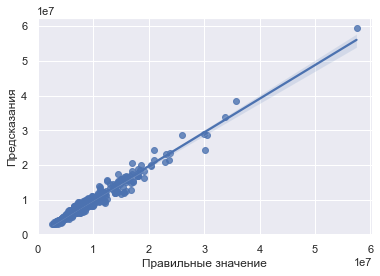

In [86]:
catb = CatBoostRegressor(iterations = 3500, #максимальное количество построенных деревьев
                         random_seed = 6, 
                         learning_rate = 0.03, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                         max_depth = 4, #глубина дерева
                         #boosting_type = 'Ordered', #может дать хорошее качество при малых выборках, работает медленно
                         #l2_leaf_reg = 10, #коэффициент при члене регуляризации L2 функции потерь
                         #bagging_temperature = 1,
                         #random_strength = 1,
                         one_hot_max_size = 30, #не используем one hot encoding, а включаем one_hot_max_size
                         #loss_function = 'MAE', #по умолчанию
                         #eval_metric = 'MAPE', #MAPE
                         od_type = 'Iter', #если модель переобучилась
                         od_wait = 20) #делай остановку через 20 итераций
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = [6, 7, 8, 9, 10, 11]

catb.fit(X_train, Y_train, 
         cat_features = cat_features, #массив с индексами категориальных фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

#Ypred = catb.predict(X_test)

pred_1 = np.exp(catb.predict(X))

pred_train = np.exp(catb.predict(X_train))
mse_train = mse(np.exp(Y_train), pred_train)
print("MAE на обучении:", round(mae(np.exp(Y_train), pred_train), 4))
print("RMSE на обучении:", round(sqrt(mse(np.exp(Y_train), pred_train)), 4))
print("MAPE на обучении:", round(mape(np.exp(Y_train), pred_train), 4))
print("R2 на обучении:", round(r2_score(np.exp(Y_train), pred_train), 4))
print("===============================")

pred_test = np.exp(catb.predict(X_test))
mse_test = mse(np.exp(Y_test), pred_test)
print("MAE на тесте:", round(mae(np.exp(Y_test), pred_test), 4))
print("RMSE на тесте:", round(sqrt(mse(np.exp(Y_test), pred_test)), 4))
print("MAPE на тесте:", round(mape(np.exp(Y_test), pred_test), 4))
print("R2 на тесте:", round(r2_score(np.exp(Y_test), pred_test), 4))
print("===============================")

print("MAE:", round(mae(np.exp(Y), pred_1), 4))
print("RMSE:", round(sqrt(mse(np.exp(Y), pred_1)), 4))
print("MAPE:", round(mape(np.exp(Y), pred_1), 4))
print("R2:", round(r2_score(np.exp(Y), pred_1), 4))

sns.regplot(np.exp(Y_test), pred_test)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.show()

In [ ]:
#Все
MAE на обучении: 844538.4218
RMSE на обучении: 1475927.2984
MAPE на обучении: 0.0824
R2 на обучении: 0.9487
===============================
MAE на тесте: 960175.6074
RMSE на тесте: 1643723.6626
MAPE на тесте: 0.0952
R2 на тесте: 0.9049
===============================
MAE: 861894.0028
RMSE: 1502307.0878
MAPE: 0.0843
R2: 0.9441

#Без витрины и координат
MAE на обучении: 671106.5074
RMSE на обучении: 988754.1034
MAPE на обучении: 0.0709
R2 на обучении: 0.9747
===============================
MAE на тесте: 809600.837
RMSE на тесте: 1176073.098
MAPE на тесте: 0.0861
R2 на тесте: 0.9468
===============================
MAE: 684980.5506
RMSE: 1009087.7374
MAPE: 0.0724
R2: 0.9728

# Тест

In [87]:
df_t = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры_Владивосток/Влад_на тест.xlsx', sheet_name = 0)
df_t

,Unnamed: 0,кв.м (торг),ОПлощадь,Этаж_1,Этаж_3,Этаж_5,Этажность_1,ГП_2,Ремонт_3,Терраса,...,ЖК,Вид_мбзп,Торг,model,Unnamed: 20,model (торг),кв.м (торг).1,отклонение,комментарий,Unnamed: 25
0,30413000,107847.517730,282.0,5,последний,последний,5,1973,Улучшенный,есть,...,нет,нет,0.0560,24671800,87488.652482,23290000,82588.652482,0.305839,Все аналоги в 2 раза меньше по площади. Выявле...,NaN
1,11738000,135856.481481,86.4,3,этажи 2-5,этажи 2-5,4,1938,Стандартный,нет,...,нет,нет,0.0660,13206320,152850.925926,12335000,142766.203704,-0.048399,сопоставимо,NaN
2,10728000,155703.918723,68.9,8,этажи 6-10,этажи 6-10,9,1985,Стандартный,нет,...,нет,нет,0.0550,12308920,178649.056604,11632000,168824.383164,-0.077717,цены в доме с июля выросли,NaN
3,35699000,245353.951890,145.5,13,этажи 11-25,неважно,44,2021,Улучшенный,нет,...,престижный+,есть,0.0500,40405060,277698.006873,38385000,263814.432990,-0.069975,"сопоставимо, аналоги все без отделки, ОО - улу...",NaN
4,8711000,162518.656716,53.6,13,этажи 11-25,этажи 11-25,24,2022,Без отделки,нет,...,нет,нет,0.0435,8765121,163528.376866,8384000,156417.910448,0.039003,Аналоги 1 и 3 имеют вид на море (указано в объ...,NaN
5,8600000,195899.772210,43.9,2,этажи 2-5,этажи 2-5,12,2022,Без отделки,нет,...,нет,нет,0.0430,7400371,168573.371298,7082000,161321.184510,0.214346,Все аналоги взяты с циан. На фарпосте цены на ...,NaN
6,6390000,145227.272727,44.0,11,этажи 11-25,этажи 11-25,24,2023,Без отделки,нет,...,нет,нет,0.0430,6450965,146612.840909,6174000,140318.181818,0.034985,сопоставимо,NaN
7,7461000,188409.090909,39.6,8,этажи 6-10,этажи 6-10,17,2022,Требует косметического ремонта,нет,...,нет,нет,0.0435,7804947,197094.621212,7465000,188510.101010,-0.000536,NaN,NaN
8,11340000,137288.135593,82.6,1,первый,первый,4,2022,Без отделки,нет,...,нет,нет,0.0430,10012020,121210.895884,9582000,116004.842615,0.183469,в расчете сделаны повышающие корректировки на ...,0.119808
9,7480000,188413.098237,39.7,2,этажи 2-5,этажи 2-5,17,2022,Требует косметического ремонта,нет,...,нет,нет,0.0435,8032994,202342.418136,7684000,193551.637280,-0.026549,NaN,NaN


In [88]:
X_t = df_t[[
            'ОПлощадь',
            'Этаж_1',
            #'Этаж_2',
            #'Этаж_3',
            #'Этаж_4',
            #'Этаж_5',
            'Этажность_1',
            #'Этажность_2',
            'ГП_2',
            #'Ремонт_2',
            'Ремонт_3',
            #'Долгота',
            #'Широта',
            #'Просмотры_1',
            #'Раст_центр_1',
            #'Раст_центр_2',
            'Раст_центр_3',
            #'Cluster_2',
            'Район_2',
            'Многоуровневая',
            'Терраса',
            #'Витрины',
            'ЖК',
            #'Статус',
            'Вид_мбзп',
            #'Вид_зр'
      ]]

X_t

,ОПлощадь,Этаж_1,Этажность_1,ГП_2,Ремонт_3,Раст_центр_3,Район_2,Многоуровневая,Терраса,ЖК,Вид_мбзп
0,282.0,5,5,1973,Улучшенный,более 10000,Санаторная,да,есть,нет,нет
1,86.4,3,4,1938,Стандартный,от 1500 до 3000,Гайдамак,нет,нет,нет,нет
2,68.9,8,9,1985,Стандартный,от 1000 до 1500,Центр,нет,нет,нет,нет
3,145.5,13,44,2021,Улучшенный,до 1000,Центр,нет,нет,престижный+,есть
4,53.6,13,24,2022,Без отделки,от 5000 до 10000,Патрокл,нет,нет,нет,нет
5,43.9,2,12,2022,Без отделки,от 1500 до 3000,Толстого (Буссе),нет,нет,нет,нет
6,44.0,11,24,2023,Без отделки,от 5000 до 10000,"64, 71_Фадеева",нет,нет,нет,нет
7,39.6,8,17,2022,Требует косметического ремонта,от 5000 до 10000,Патрокл,нет,нет,нет,нет
8,82.6,1,4,2022,Без отделки,более 10000,Садгород,нет,нет,нет,нет
9,39.7,2,17,2022,Требует косметического ремонта,от 5000 до 10000,Патрокл,нет,нет,нет,нет


In [89]:
pred_t = np.exp(catb.predict(X_t))

C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [90]:
X_t['Прогноз'] = pred_t
X_t

C:\Users\skapr\AppData\Local\Temp\ipykernel_14956\3071366178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_t['Прогноз'] = pred_t


,ОПлощадь,Этаж_1,Этажность_1,ГП_2,Ремонт_3,Раст_центр_3,Район_2,Многоуровневая,Терраса,ЖК,Вид_мбзп,Прогноз
0,282.0,5,5,1973,Улучшенный,более 10000,Санаторная,да,есть,нет,нет,2.337678e+07
1,86.4,3,4,1938,Стандартный,от 1500 до 3000,Гайдамак,нет,нет,нет,нет,1.321573e+07
2,68.9,8,9,1985,Стандартный,от 1000 до 1500,Центр,нет,нет,нет,нет,1.220243e+07
3,145.5,13,44,2021,Улучшенный,до 1000,Центр,нет,нет,престижный+,есть,4.100702e+07
4,53.6,13,24,2022,Без отделки,от 5000 до 10000,Патрокл,нет,нет,нет,нет,8.703276e+06
5,43.9,2,12,2022,Без отделки,от 1500 до 3000,Толстого (Буссе),нет,нет,нет,нет,7.685308e+06
6,44.0,11,24,2023,Без отделки,от 5000 до 10000,"64, 71_Фадеева",нет,нет,нет,нет,6.491996e+06
7,39.6,8,17,2022,Требует косметического ремонта,от 5000 до 10000,Патрокл,нет,нет,нет,нет,7.919789e+06
8,82.6,1,4,2022,Без отделки,более 10000,Садгород,нет,нет,нет,нет,1.020740e+07
9,39.7,2,17,2022,Требует косметического ремонта,от 5000 до 10000,Патрокл,нет,нет,нет,нет,7.900107e+06


In [91]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Владивосток_прогноз_тест.xlsx')
X_t.to_excel(writer, 'прогноз')
writer.save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_14956\3710954601.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [92]:
f = catb.get_feature_importance(prettified = True)
f = pd.DataFrame(f)
f

,Feature Id,Importances
0,ОПлощадь,60.028076
1,Район_2,10.888217
2,Ремонт_3,8.698509
3,ГП_2,5.414947
4,ЖК,4.698573
5,Этажность_1,4.429697
6,Раст_центр_3,4.141270
7,Этаж_1,0.983654
8,Вид_мбзп,0.591037
9,Терраса,0.079834


Text(0.5, 0, 'CatBoost Feature Importance')

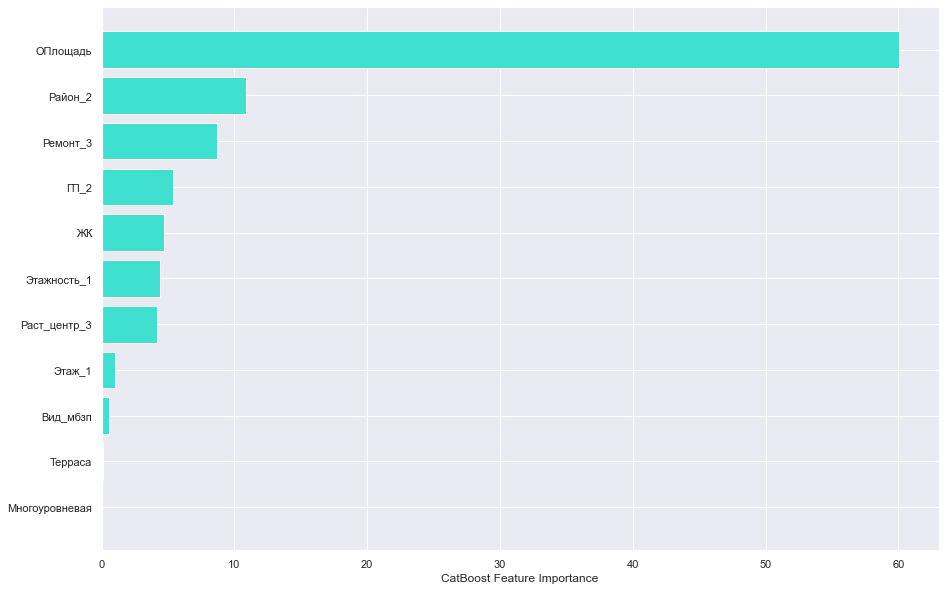

In [93]:
from sklearn.inspection import permutation_importance

feature_names = [
                    'ОПлощадь',
                    'Этаж_1',
                    #'Этаж_2',
                    #'Этаж_3',
                    #'Этаж_4',
                    #'Этаж_5',
                    'Этажность_1',
                    #'Этажность_2',
                    'ГП_2',
                    #'Ремонт_2',
                    'Ремонт_3',
                    #'Долгота',
                    #'Широта',
                    #'Просмотры_1',
                    #'Раст_центр_1',
                    #'Раст_центр_2',
                    'Раст_центр_3',
                    #'Cluster_2',
                    'Район_2',
                    'Многоуровневая',
                    'Терраса',
                    #'Витрины',
                    'ЖК',
                    #'Статус',
                    'Вид_мбзп',
                    #'Вид_зр'
                ]
features = np.array(feature_names)

sorted_feature_importance = catb.feature_importances_.argsort()
plt.figure(figsize = (15, 10))
plt.barh(features[sorted_feature_importance], 
         catb.feature_importances_[sorted_feature_importance], 
         color = 'turquoise')
plt.xlabel("CatBoost Feature Importance")

In [94]:
pred_test

array([ 8284651.10891618,  7856392.24663341,  6253576.01332094,
       12191592.24854961,  9788615.6923022 , 11874774.92011993,
        3972542.66545134, 11795618.59101888, 17592261.41082877,
       11303090.34902141,  9517928.74062071, 17332306.40752293,
        6130916.13005456,  5121612.91865173,  9957991.63106744,
        5522124.00953077,  8611832.20636944,  8267154.41537111,
        7707033.18897222,  6607812.37604107, 13838869.19954115,
       11921622.72554316,  6047728.08778979,  5536513.43418798,
        9135576.686652  ,  4930143.90563772,  8435477.56092544,
       19970178.50433377, 10850671.86772778,  8794517.37549867,
        8049540.7993043 ,  6658014.03178758,  3916368.74365754,
        7121948.39725051,  8135364.3342619 ,  7324172.2140883 ,
        6357369.31852359, 12426281.34161411, 13023966.85378673,
       11123036.31803301, 18243936.03205736,  8050510.94301021,
        9966560.05079689,  7071128.29657362,  3281714.18199734,
       16785229.58183949, 14393373.79142

In [95]:
pred = pd.DataFrame(pred_1, columns = ['Прогноз'])
pred['ID'] = df['ID']
pred

,Прогноз,ID
0,3.420640e+06,33_этажи
1,6.828664e+06,58_этажи
2,6.647027e+06,71_этажи
3,6.797359e+06,85_этажи
4,5.791697e+06,105_этажи
...,...,...
4493,5.951859e+06,3806_фарпост
4494,1.439337e+07,3808_фарпост
4495,8.599492e+06,3809_фарпост
4496,9.508482e+06,3810_фарпост


In [1121]:
pred[pred['ID'] == '2050_циан']

,Прогноз,ID
1342,1.046269e+08,2050_циан


In [96]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Владивосток_прогноз_ln_раст3.xlsx')
pred.to_excel(writer, 'прогноз')
writer.save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_14956\754578547.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# Анализ ошибок

In [97]:
pred['Истина'] = df['Цена']
pred['MAE'] = pred['Истина'] - pred['Прогноз']
pred

,Прогноз,ID,Истина,MAE
0,3.420640e+06,33_этажи,3400000,-2.063956e+04
1,6.828664e+06,58_этажи,7800000,9.713362e+05
2,6.647027e+06,71_этажи,7500000,8.529733e+05
3,6.797359e+06,85_этажи,6200000,-5.973588e+05
4,5.791697e+06,105_этажи,5100000,-6.916972e+05
...,...,...,...,...
4493,5.951859e+06,3806_фарпост,6300000,3.481413e+05
4494,1.439337e+07,3808_фарпост,13500000,-8.933738e+05
4495,8.599492e+06,3809_фарпост,7400000,-1.199492e+06
4496,9.508482e+06,3810_фарпост,8900000,-6.084822e+05


In [98]:
pred['MAPE'] = pred['MAE'] / pred['Истина']

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


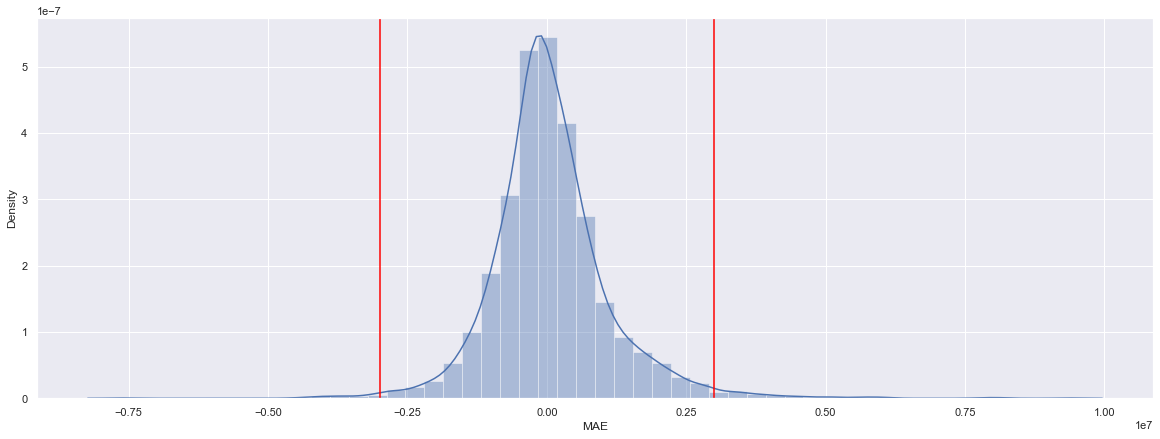

In [99]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(pred['MAE'])

plt.axvline(-3000000, color = 'red')
plt.axvline(3000000, color = 'red')

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


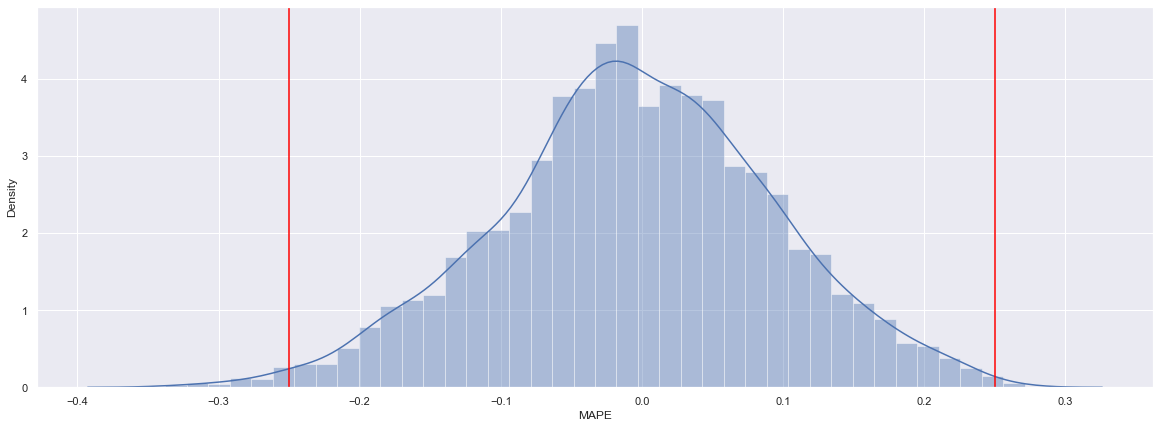

In [100]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(pred['MAPE'])

plt.axvline(-0.25, color = 'red')
plt.axvline(0.25, color = 'red')

2


C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


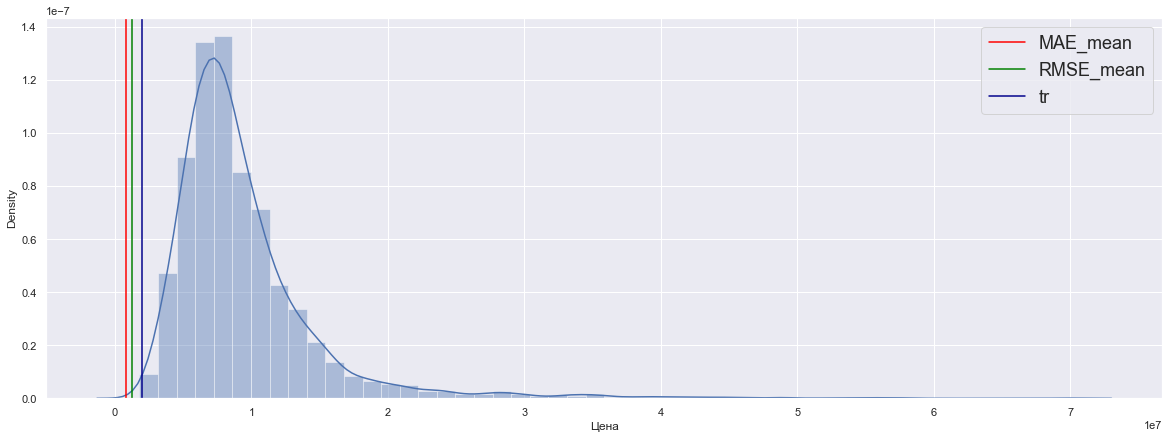

In [102]:
#График строится для понимания: mae и rmse - это много относительно цен квартир или нет?
#MAE_mean: 776758.67782
#RMSE_mean: 1215716.1590000002

tr = 2000000
print(len(df[df['Цена'] <= tr]))

sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df['Цена'])

plt.axvline(776758.67782, color = 'red', label = 'MAE_mean')
plt.axvline(1215716.1590000002, color = 'green', label = 'RMSE_mean')
plt.axvline(tr, color = 'darkblue', label = 'tr')
#plt.axvline(0.08, color = 'green', label = 'медиана')
plt.legend(prop = {'size': 18})

In [104]:
df = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры_Владивосток/Выборка.xlsx', sheet_name = 0)
df = df[df['Мусор'] == 0]
df = df[df['dup_res'] == 0]
df = df[df['Выброс_итог'] == 0]
#df = df[df['LN(Цена)'] <= 17.5]
df.reset_index(drop = True, inplace = True)
df

,ID,Мусор,Агрегатор,LN(Цена),LNLN(Цена),Корень2(Цена),Корень3(Цена),Цена,Цена_перв,Прогноз_1,...,Расположение на этаже,Срок сдачи,Выдача ключей,Отделка,Название новостройки,Тип участия,Название ЖК,Подъезд,Способ продажи,Вид сделки
0,33_этажи,0,этажи,15.039286,2.710666,1843.908891,150.369460,3400000,3600000.0,3.392260e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58_этажи,0,этажи,15.869634,2.764407,2792.848009,198.319248,7800000,NaN,6.809348e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71_этажи,0,этажи,15.830414,2.761933,2738.612788,195.743382,7500000,NaN,6.552275e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85_этажи,0,этажи,15.640060,2.749836,2489.979920,183.709055,6200000,NaN,6.572362e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105_этажи,0,этажи,15.444751,2.737269,2258.317958,172.130062,5100000,5150000.0,5.744776e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,3806_фарпост,0,фарпост,15.656060,2.750858,2509.980080,184.691475,6300000,NaN,5.975461e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4494,3808_фарпост,0,фарпост,16.418200,2.798390,3674.234614,238.110158,13500000,NaN,1.350000e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4495,3809_фарпост,0,фарпост,15.816991,2.761085,2720.294102,194.869516,7400000,NaN,7.400000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4496,3810_фарпост,0,фарпост,16.001562,2.772686,2983.286778,207.235110,8900000,NaN,8.900000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Анализ ошибок (престижные+)

In [105]:
df_pres_plus = df[df['ЖК'] == 'престижный+']

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAE', ylabel='Density'>

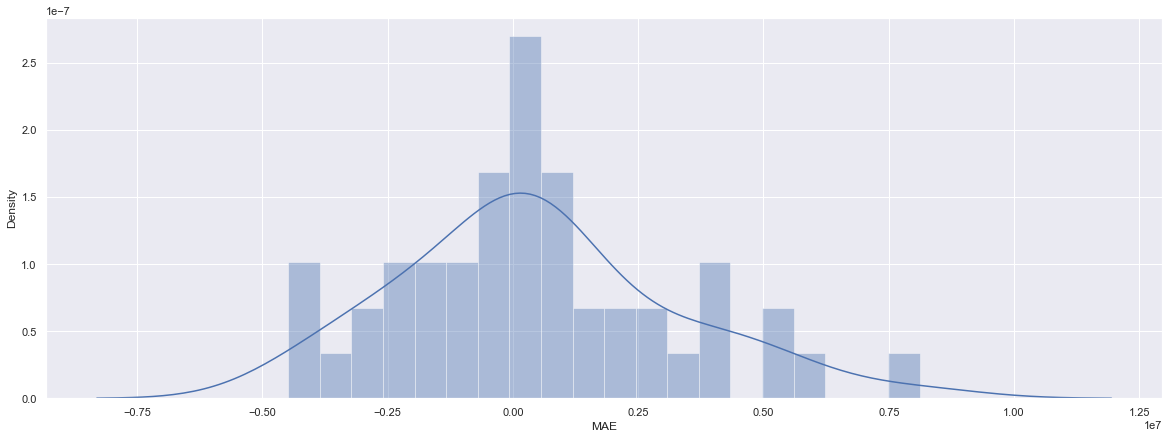

In [106]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_pres_plus['MAE'], bins = 20)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAPE', ylabel='Density'>

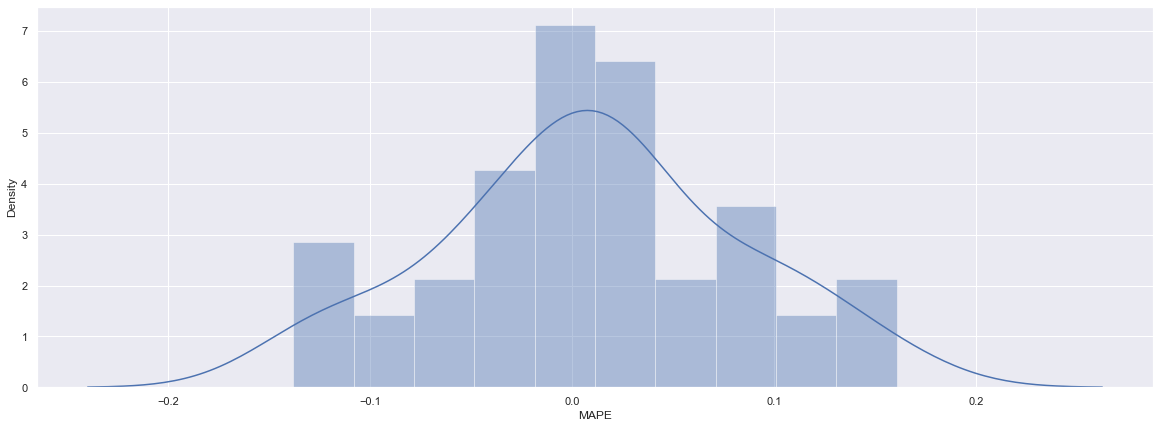

In [107]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_pres_plus['MAPE'], bins = 10)

# Анализ ошибок (престижные)

In [108]:
df_pres = df[df['ЖК'] == 'престижный']

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAE', ylabel='Density'>

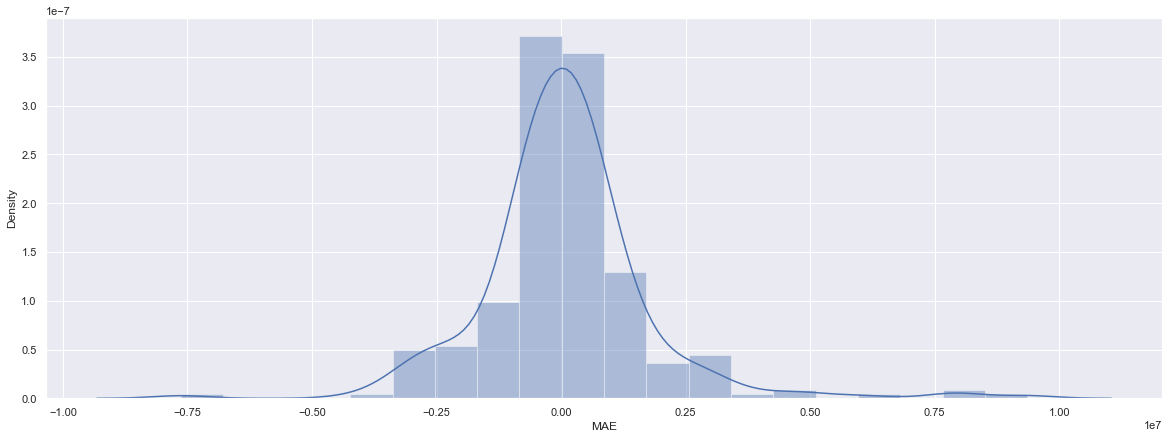

In [109]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_pres['MAE'], bins = 20)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAPE', ylabel='Density'>

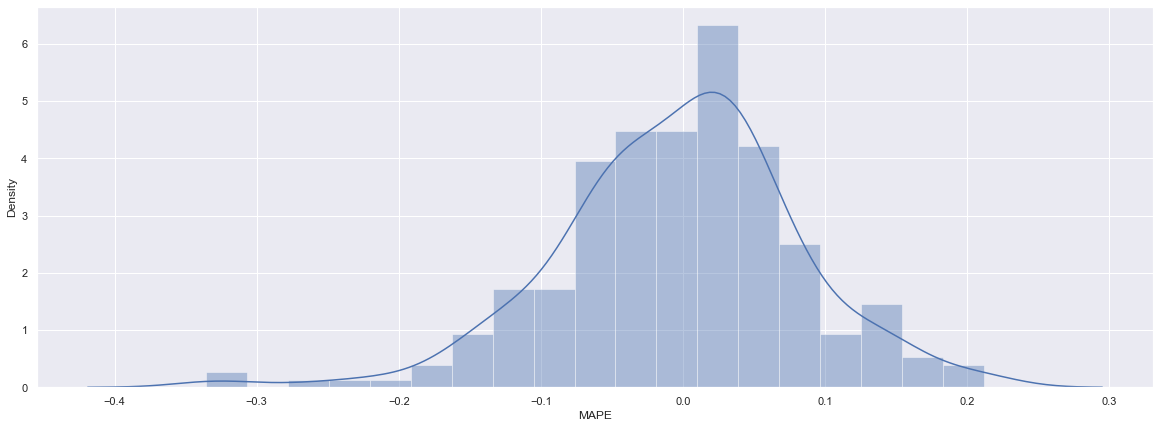

In [111]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_pres['MAPE'])

# Анализ ошибок (премиальный+)

In [112]:
df_prem = df[df['Ремонт_3'] == 'Премиальный+']

In [113]:
annot = df_prem['MAPE']*100
annot = list(annot.round(2))
annot

[4.51, -6.13, 13.39, -3.55, -3.06, 10.66, -5.02, 6.08, 3.3]

In [114]:
annot = list(df_prem['MAPE'].transform(lambda x: '{:,.2%}'.format(x)))
annot

['4.51%',
 '-6.13%',
 '13.39%',
 '-3.55%',
 '-3.06%',
 '10.66%',
 '-5.02%',
 '6.08%',
 '3.30%']

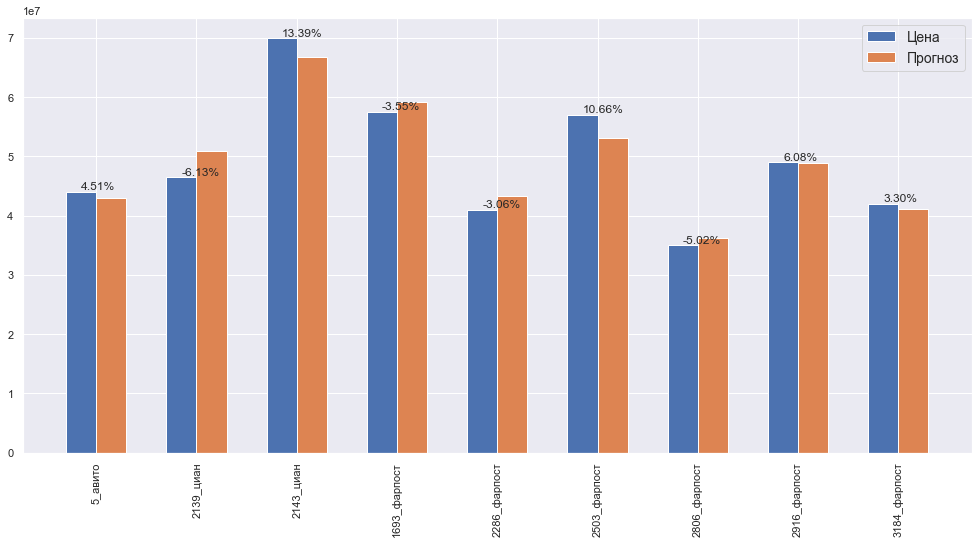

In [116]:
fig = plt.figure(figsize = (17, 8))
ax = fig.add_subplot()

x_labels = list(df_prem['ID'])

x = np.arange(1, 10, 1)
w = 0.3
ax.bar(x - w/2, df_prem['Цена'], width = w, label = 'Цена')
ax.bar(x + w/2, df_prem['Прогноз_2'], width = w, label = 'Прогноз')
ax.set_xticks(x, labels = x_labels, rotation = 90)
ax.legend(prop = {'size': 14})

annot = list(df_prem['MAPE'].transform(lambda x: '{:,.2%}'.format(x)))
rects = ax.patches

for rect, an in zip(rects, annot):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, an, ha = "left", va = "bottom")

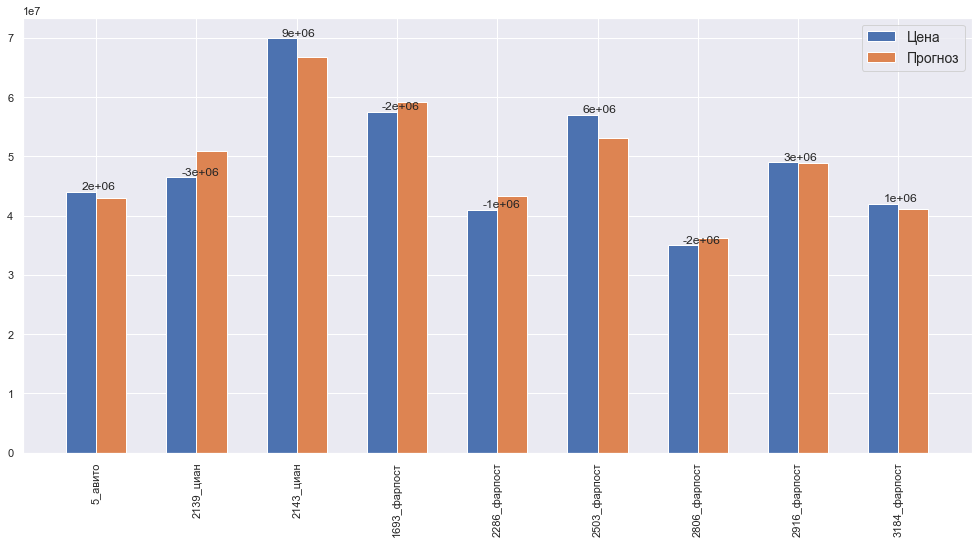

In [117]:
fig = plt.figure(figsize = (17, 8))
ax = fig.add_subplot()

x_labels = list(df_prem['ID'])

x = np.arange(1, 10, 1)
w = 0.3
ax.bar(x - w/2, df_prem['Цена'], width = w, label = 'Цена')
ax.bar(x + w/2, df_prem['Прогноз_2'], width = w, label = 'Прогноз')
ax.set_xticks(x, labels = x_labels, rotation = 90)
ax.legend(prop = {'size': 14})

annot = list(df_prem['MAE'].transform(lambda x: '{:,.0}'.format(x)))
rects = ax.patches

for rect, an in zip(rects, annot):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, an, ha = "left", va = "bottom")

# Анализ ошибок (без отделки)

In [118]:
df_noot = df[df['Ремонт_3'] == 'Без отделки']

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAE', ylabel='Density'>

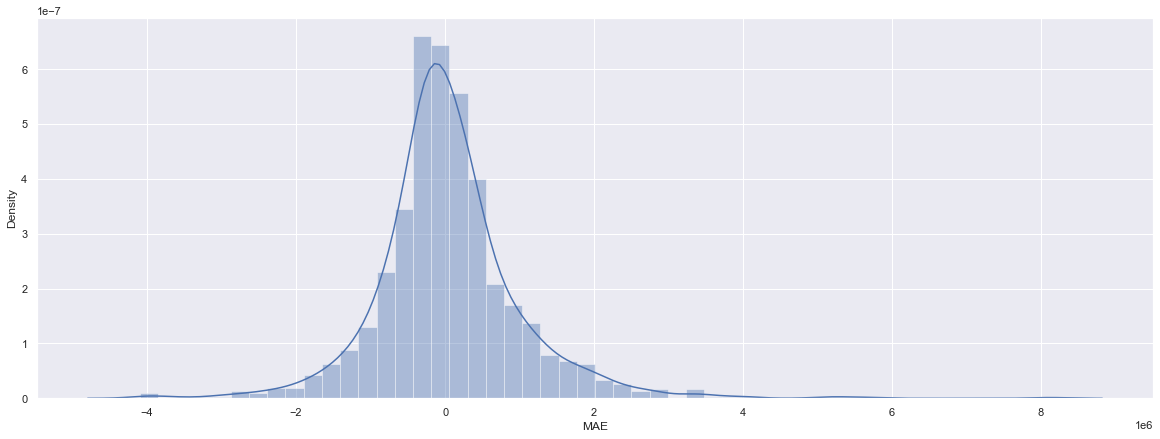

In [119]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_noot['MAE'])

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAPE', ylabel='Density'>

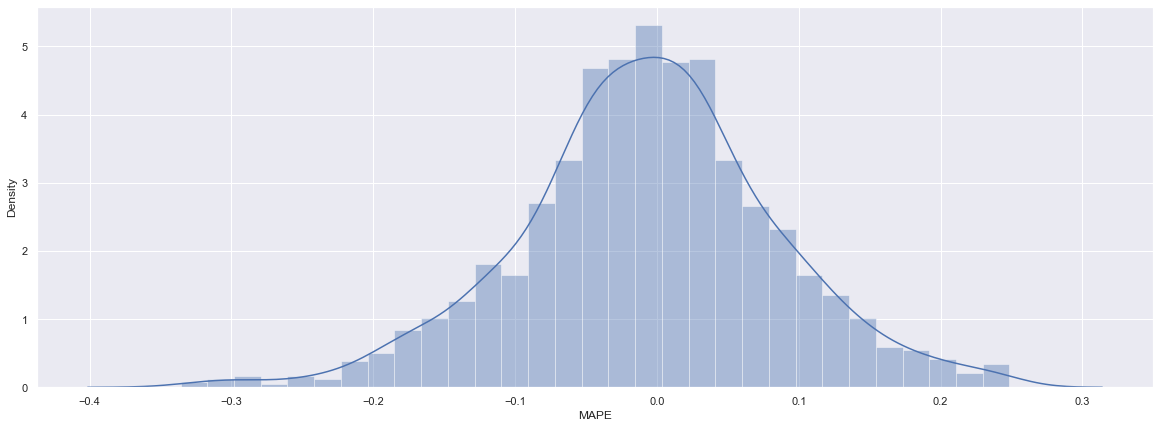

In [120]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_noot['MAPE'])

# Последний этаж

In [121]:
df_fl = df[df['Этаж_3'] == 'последний']

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAE', ylabel='Density'>

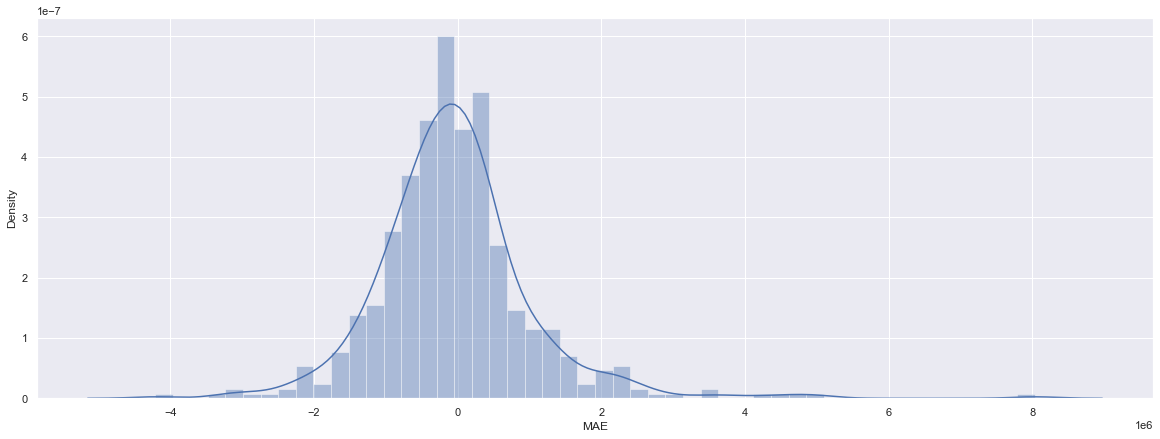

In [122]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_fl['MAE'])

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MAPE', ylabel='Density'>

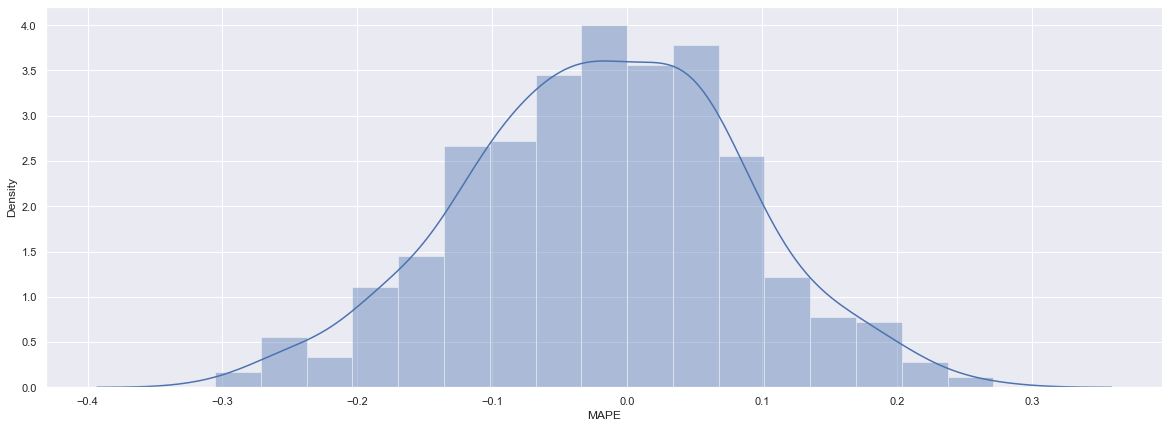

In [123]:
sns.set()
plt.figure(figsize = (20, 7))
sns.distplot(df_fl['MAPE'])

# Прочее

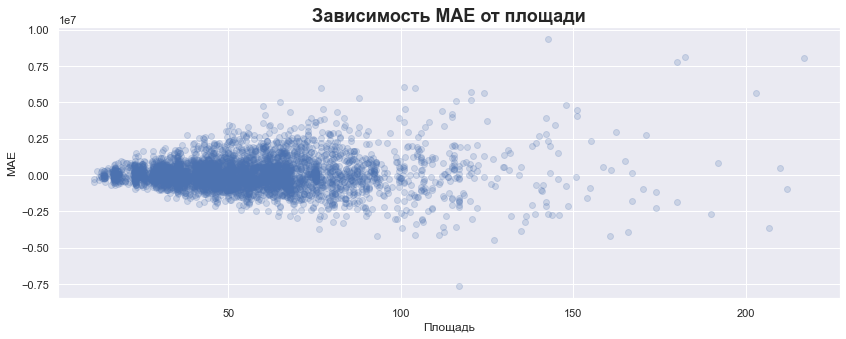

In [124]:
plt.figure(figsize = (14, 5))
plt.scatter(x = df['ОПлощадь'], y = df['MAE'], alpha = 0.2)
#plt.axhline(y = 10, color = 'r', linestyle = '-', alpha = 0.7)
#plt.yticks(np.arange(0, 110, 10))
#plt.xticks(np.arange(1880, 2030, 10))
plt.xlabel('Площадь')
plt.ylabel('MAE')
plt.title('Зависимость MAE от площади', fontweight = 'bold', fontsize = 18)
plt.show()

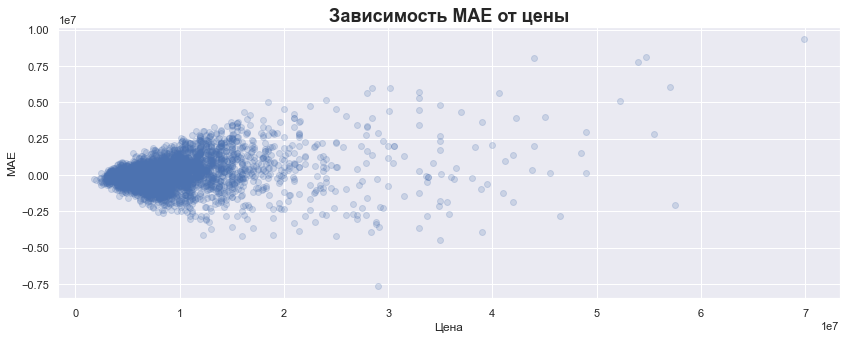

In [125]:
plt.figure(figsize = (14, 5))
plt.scatter(x = df['Цена'], y = df['MAE'], alpha = 0.2)
#plt.axhline(y = 10, color = 'r', linestyle = '-', alpha = 0.7)
#plt.yticks(np.arange(0, 110, 10))
#plt.xticks(np.arange(1880, 2030, 10))
plt.xlabel('Цена')
plt.ylabel('MAE')
plt.title('Зависимость MAE от цены', fontweight = 'bold', fontsize = 18)
plt.show()

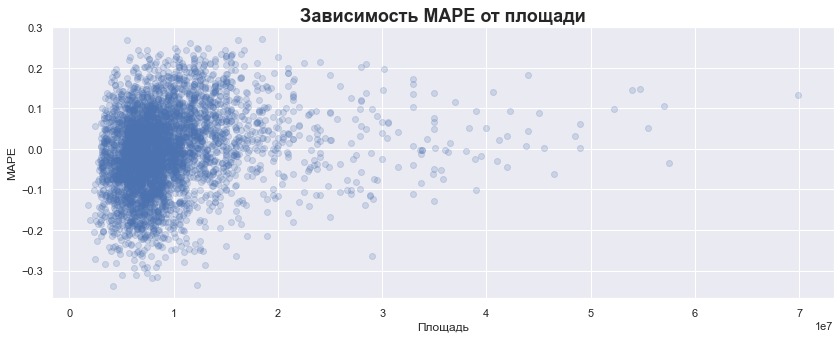

In [126]:
plt.figure(figsize = (14, 5))
plt.scatter(x = df['Цена'], y = df['MAPE'], alpha = 0.2)
#plt.axhline(y = 10, color = 'r', linestyle = '-', alpha = 0.7)
#plt.yticks(np.arange(0, 110, 10))
#plt.xticks(np.arange(1880, 2030, 10))
plt.xlabel('Площадь')
plt.ylabel('MAPE')
plt.title('Зависимость MAPE от площади', fontweight = 'bold', fontsize = 18)
plt.show()

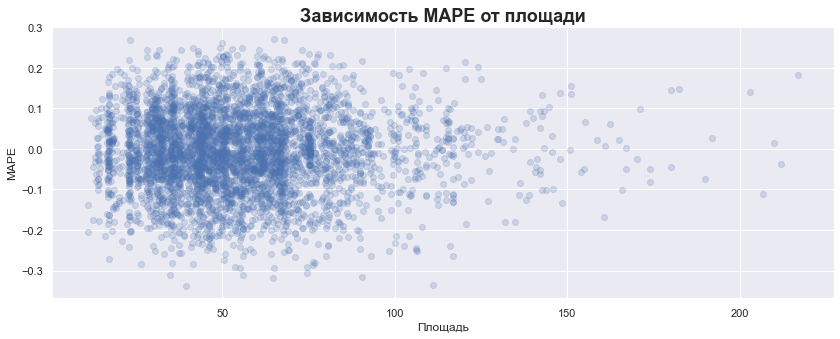

In [127]:
plt.figure(figsize = (14, 5))
plt.scatter(x = df['ОПлощадь'], y = df['MAPE'], alpha = 0.2)
#plt.axhline(y = 10, color = 'r', linestyle = '-', alpha = 0.7)
#plt.yticks(np.arange(0, 110, 10))
#plt.xticks(np.arange(1880, 2030, 10))
plt.xlabel('Площадь')
plt.ylabel('MAPE')
plt.title('Зависимость MAPE от площади', fontweight = 'bold', fontsize = 18)
plt.show()

# Сохранение модели

In [103]:
import pickle

pickle.dump(catb, open('catbmodel_vladik_best(ln).pkl', 'wb'))

# 310_прогноз

In [128]:
model_1 = pickle.load(open('catbmodel_vladik_best(ln).pkl', 'rb'))

In [129]:
df_310 = pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры_Владивосток/310_от Ильгара_Владивосток.xlsx', sheet_name = 0)
df_310

,report_date,Адрес,Код банка,obj_cd,realty_tp_cd,Адрес_yandex,Долгота,Широта,Сцепка_к,Кадастровый №,...,Прогноз_model,за 1 кв.м.1,Прогноз_model_торг,за 1 кв.м.2,%,абс.,Прогноз_анал*1.1,Accept_модель,%.1,абс..1
0,2023-10-01,"690002, Приморский край, г Владивосток, ул Ком...",843,99373293172,3,"Россия, Приморский край, Владивосток, Комсомол...",131.897630,43.130368,131.89763 43.130368,25:28:000000:12172,...,5.925248e+06,211615.987639,5.603803e+06,200135.820309,0.078276,4.068030e+05,6.164183e+06,accept,0.186104,9.671833e+05
1,2023-10-01,"690091, Приморский край, г Владивосток, пер Не...",843,35895600759,3,"Россия, Приморский край, Владивосток, Некрасов...",131.896372,43.118339,131.896372 43.118339,25:28:000000:37102,...,2.554872e+07,271794.865347,2.416270e+07,257049.993902,0.035470,8.276994e+05,2.657897e+07,accept,0.139017,3.243969e+06
2,2023-10-01,690068 Россия край Приморский г Владивосток ул...,1000,131235683856519264748837164633616456873,3,"Россия, Приморский край, Владивосток, улица Ки...",131.907502,43.175538,131.907502 43.175538,25:28:000000:37173,...,1.339656e+07,157606.612150,1.266980e+07,149056.453441,-0.149578,-2.228443e+06,1.393678e+07,unaccept,-0.064535,-9.614636e+05
3,2023-10-01,"690080, Приморский край, г Владивосток, ул Бас...",843,2467315452,3,"Россия, Приморский край, Владивосток, улица Ба...",131.957727,43.075694,131.957727 43.075694,25:28:000000:67726,...,1.606061e+07,203298.919653,1.518933e+07,192269.953262,0.077257,1.089326e+06,1.670826e+07,accept,0.184983,2.608259e+06
4,2023-10-01,"690080, Приморский край, г Владивосток, ул Бас...",843,58530540092,3,"Россия, Приморский край, Владивосток, улица Ба...",131.956362,43.075589,131.956362 43.075589,25:28:000000:9018,...,1.462863e+07,189982.179066,1.383502e+07,179675.645852,0.024817,3.350247e+05,1.521853e+07,accept,0.127298,1.718527e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2023-10-01,"690041, Приморский край, г Владивосток, ул Гаг...",1481,НККЖ0000000000052384282,3,"Россия, Приморский край, Владивосток, улица Га...",131.940273,43.203244,131.940273 43.203244,25:28:050035:2712,...,1.512321e+07,145415.445383,1.430277e+07,137526.657471,-0.386908,-9.026126e+06,1.573305e+07,unaccept,-0.325598,-7.595848e+06
264,2023-10-01,"690068, Приморский край, г Владивосток, ул Кир...",843,20539727990,3,"Россия, Приморский край, Владивосток, улица Ки...",131.910539,43.181041,131.910539 43.181041,25:28:050038:137,...,6.802833e+06,161972.203745,6.433779e+06,153185.211692,0.025794,1.617789e+05,7.077157e+06,accept,0.128373,8.051568e+05
265,2023-10-01,"690068, Приморский край, г Владивосток, ул Чка...",843,2467333074,3,"Россия, Приморский край, Владивосток, улица Чк...",131.914249,43.179634,131.914249 43.179634,25:28:050039:2078,...,6.712539e+06,152557.712591,6.348384e+06,144281.456683,-0.008065,-5.161591e+04,6.983223e+06,accept,0.091129,5.832225e+05
266,2023-10-01,"Приморский край, г. Владивосток, проспект 100-...",85,103644-1602,3,"Россия, Приморский край, Владивосток, проспект...",131.916701,43.165972,131.916701 43.165972,25:28:050046:2485,...,8.706082e+06,207287.669188,8.233777e+06,196042.313135,0.941929,3.993777e+06,9.057155e+06,accept,1.136121,4.817155e+06


In [130]:
X_310 = df_310[[
                'ОПлощадь',
                'Этаж_1',
                #'Этаж_2',
                #'Этаж_3',
                #'Этаж_4',
                #'Этаж_5',
                'Этажность_1',
                #'Этажность_2',
                'ГП_2',
                #'Ремонт_2',
                'Ремонт_3',
                #'Долгота',
                #'Широта',
                #'Просмотры_1',
                #'Раст_центр_1',
                #'Раст_центр_2',
                'Раст_центр_3',
                #'Cluster_2',
                'Район_2',
                'Многоуровневая',
                'Терраса',
                #'Витрины',
                'ЖК',
                #'Статус',
                'Вид_мбзп',
                #'Вид_зр'
      ]]

X_310

,ОПлощадь,Этаж_1,Этажность_1,ГП_2,Ремонт_3,Раст_центр_3,Район_2,Многоуровневая,Терраса,ЖК,Вид_мбзп
0,28,4,5,1970,Стандартный,от 1500 до 3000,Первая речка,нет,нет,нет,нет
1,94,9,17,2011,Стандартный,до 1000,Центр,нет,нет,престижный,нет
2,85,2,16,2006,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет
3,79,5,5,2012,Стандартный,от 5000 до 10000,Патрокл,нет,нет,нет,есть
4,77,1,5,2012,Стандартный,от 5000 до 10000,Патрокл,нет,нет,нет,есть
...,...,...,...,...,...,...,...,...,...,...,...
263,104,3,3,2018,Стандартный,более 10000,Седанка_Чайка,нет,нет,нет,нет
264,42,8,9,1988,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет
265,44,1,10,1977,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет
266,42,12,15,2014,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет


In [131]:
pred_t = np.exp(model_1.predict(X_310))

C:\Users\skapr\AppData\Roaming\Python\Python39\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [132]:
X_310['Прогноз'] = pred_t
X_310

C:\Users\skapr\AppData\Local\Temp\ipykernel_14956\1765764937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_310['Прогноз'] = pred_t


,ОПлощадь,Этаж_1,Этажность_1,ГП_2,Ремонт_3,Раст_центр_3,Район_2,Многоуровневая,Терраса,ЖК,Вид_мбзп,Прогноз
0,28,4,5,1970,Стандартный,от 1500 до 3000,Первая речка,нет,нет,нет,нет,5.761644e+06
1,94,9,17,2011,Стандартный,до 1000,Центр,нет,нет,престижный,нет,2.668628e+07
2,85,2,16,2006,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет,1.366045e+07
3,79,5,5,2012,Стандартный,от 5000 до 10000,Патрокл,нет,нет,нет,есть,1.569080e+07
4,77,1,5,2012,Стандартный,от 5000 до 10000,Патрокл,нет,нет,нет,есть,1.439987e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
263,104,3,3,2018,Стандартный,более 10000,Седанка_Чайка,нет,нет,нет,нет,1.525945e+07
264,42,8,9,1988,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет,6.896312e+06
265,44,1,10,1977,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет,6.676039e+06
266,42,12,15,2014,Стандартный,от 5000 до 10000,Вторая Речка,нет,нет,нет,нет,8.824926e+06


In [133]:
#Сохраняем в Excel
writer = pd.ExcelWriter('Владивосток_прогноз_310.xlsx')
X_310.to_excel(writer, 'прогноз')
writer.save()

C:\Users\skapr\AppData\Local\Temp\ipykernel_14956\1674591594.py:4: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
